In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

In [2]:
import kagglehub
import pandas as pd
import os

# Descargar el dataset usando kagglehub
# El nombre del dataset es 'prachi13/customer-analytics' de la URL proporcionada.
path = kagglehub.dataset_download("prachi13/customer-analytics")

print(f"Ruta a los archivos del dataset: {path}")

# Listar los archivos en el directorio descargado para encontrar el CSV
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    # Asumiendo que el dataset relevante es el primero .csv encontrado
    file_name = csv_files[0]
    full_file_path = os.path.join(path, file_name)

    df = pd.read_csv(full_file_path)
    print(f"Dataset '{file_name}' cargado exitosamente. Mostrando las primeras 5 filas:")
    display(df.head())
else:
    print(f"Error: No se encontraron archivos .csv en el directorio: {path}. Por favor, verifica el contenido del dataset descargado.")

100%|██████████| 121k/121k [00:00<00:00, 24.0MB/s]

Extracting files...
Ruta a los archivos del dataset: /root/.cache/kagglehub/datasets/prachi13/customer-analytics/versions/1
Dataset 'Train.csv' cargado exitosamente. Mostrando las primeras 5 filas:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Verificamos que el target es el REACHED.ON.TIME Osea el alcanzado a tiempo Ya que definimos que al cliente le llego a tiempo sus pedidos

In [5]:
target = "Reached.on.Time_Y.N"

df[target].value_counts()

,count
Reached.on.Time_Y.N,
1,6563
0,4436


In [6]:
nominal_cols = ["Warehouse_block", "Mode_of_Shipment", "Gender"]
ordinal_cols = ["Product_importance"]

numeric_cols = df.drop(columns=nominal_cols + ordinal_cols + [target]).columns.tolist()

print("Numéricas:", numeric_cols)

Numéricas: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


# PREPROCESAMIENTO

## ONE HOT ENCODING

In [7]:
nominal_cols = ["Warehouse_block", "Mode_of_Shipment", "Gender"]
ordinal_cols = ["Product_importance"]

numeric_cols = df.drop(columns=nominal_cols + ordinal_cols + [target]).columns.tolist()

In [8]:
# Orden explícito para variable ordinal
importance_order = [["low", "medium", "high"]]

ordinal_encoder = OrdinalEncoder(categories=importance_order)
onehot_encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("nom", onehot_encoder, nominal_cols),
        ("ord", ordinal_encoder, ordinal_cols)
    ]
)

In [9]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Regresion linear

In [10]:
linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("=== REGRESIÓN LINEAL ===")
print("MAE:", mae_linear)
print("RMSE:", rmse_linear)

=== REGRESIÓN LINEAL ===
MAE: 0.3903390655279298
RMSE: 0.4365737066767025


In [11]:
if rmse_linear > mae_linear * 1.5:
    print("RMSE es considerablemente mayor que MAE → posible presencia de outliers.")
else:
    print("No se detecta diferencia extrema entre RMSE y MAE.")

No se detecta diferencia extrema entre RMSE y MAE.


## Regresion con metodo Rigde

In [12]:
ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("=== RIDGE ===")
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)

=== RIDGE ===
MAE: 0.3903390286843379
RMSE: 0.4365735199194047


## Comparacion entre ambos de Linear y Ridge

In [13]:
comparison = pd.DataFrame({
    "Modelo": ["Linear Regression", "Ridge"],
    "MAE": [mae_linear, mae_ridge],
    "RMSE": [rmse_linear, rmse_ridge]
})

comparison

,Modelo,MAE,RMSE
0,Linear Regression,0.390339,0.436574
1,Ridge,0.390339,0.436574


In [18]:
log_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Matriz de confusion

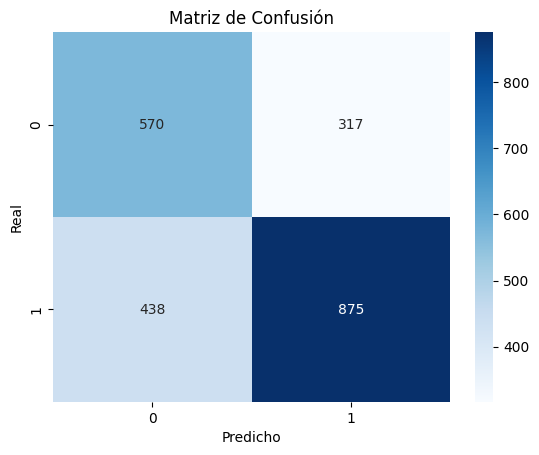

array([[570, 317],
       [438, 875]])

In [19]:
cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

cm

## Reporte del entrenamiento

In [20]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.67      0.66      0.66      2200

